In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import scipy
# import torch
from PIL import Image

In [3]:
pathExists = [False,False]
while pathExists != [True,True]:
    inLeft = input("Enter filename of left image (with extension):")
    inRight = input("Enter filename of right image (with extension):")

    imageFolder=os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep +"input")
    pathLeft=imageFolder+os.sep+inLeft
    pathRight=imageFolder+os.sep+inRight

    # Debug
    print(imageFolder)
    pathInputs = [pathLeft, pathRight]
    
    print(pathInputs)

    for i in range(0,len(pathInputs)):
        try:
            with open(pathInputs[i], 'r') as file:
                # Do something with the file
                # print("File exists!")
                pathExists[i] = True
        except FileNotFoundError:
            print("File not found or path is incorrect.")
        except Exception as e:
            print("An error occurred:", e)

c:\Users\andyc\Documents\Tufts\EE97\MPSR\TeamPeriwinkle\input
['c:\\Users\\andyc\\Documents\\Tufts\\EE97\\MPSR\\TeamPeriwinkle\\input\\574_L.png', 'c:\\Users\\andyc\\Documents\\Tufts\\EE97\\MPSR\\TeamPeriwinkle\\input\\574_R.png']


In [4]:
img = np.empty(2)
imgLeft = cv2.imread(pathInputs[0])
imgRight = cv2.imread(pathInputs[1])



cv2.imshow("Left Input Image",imgLeft)
k = cv2.waitKey(0)
if k == 27 or k == ord('q'):
    cv2.destroyAllWindows()
cv2.imshow("Right Input Image",imgRight)
k = cv2.waitKey(0)
if k == 27 or k == ord('q'):
    cv2.destroyAllWindows()



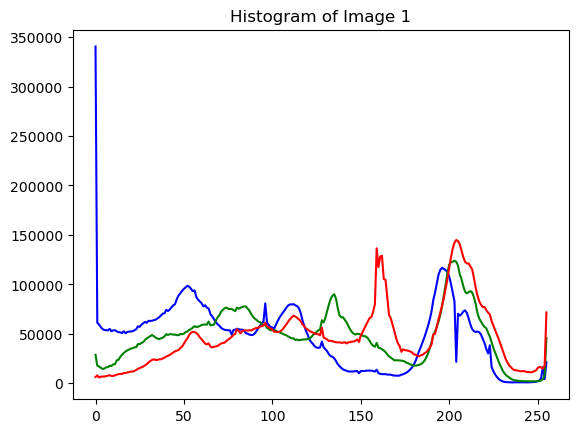

<Figure size 600x450 with 0 Axes>

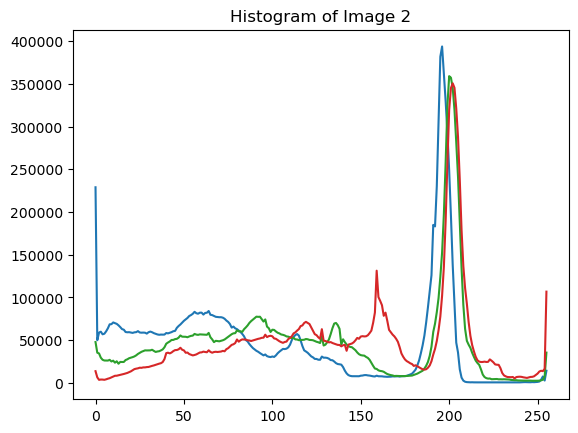

<Figure size 600x450 with 0 Axes>

In [25]:
bins = 50

# Plot color channel histograms
  
color = ('b','g','r')
for i,col in enumerate(color):
    hist = cv2.calcHist([imgLeft],[i],None,[256],[0,256])
    plt.plot(hist,color = col)
plt.title("Histogram of Image 1")
plt.figure(figsize=(6,4.5))
plt.show()

color_tab = ('tab:blue','tab:green','tab:red')
for i,col in enumerate(color_tab):
    hist = cv2.calcHist([imgRight],[i],None,[256],[0,256])
    plt.plot(hist,color = col)
plt.title("Histogram of Image 2")
plt.figure(figsize=(6,4.5))
plt.show()

# Normalize histograms

color = ('b','g','r')
histLeft = cv2.calcHist([imgLeft], [0, 1, 2], None, [bins, bins, bins], [0, 255, 0, 255, 0, 255])
histLeft = cv2.normalize(histLeft, histLeft, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);

color_tab = ('tab:blue','tab:green','tab:red')
histRight = cv2.calcHist([imgRight], [0, 1, 2], None, [bins, bins, bins], [0, 255, 0, 255, 0, 255]) 
histRight = cv2.normalize(histRight, histRight, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);

histInputs = histLeft + histRight
histInputs = cv2.normalize(histInputs,histInputs,alpha=0,beta=1,norm_type=cv2.NORM_MINMAX)


In [16]:
testHist = histLeft + histRight
refHist = histRight

accuracy_metric = np.zeros(4)
 
accuracy_metric[0] = (cv2.compareHist(refHist, testHist, cv2.HISTCMP_CORREL)) # Correlation
accuracy_metric[1] = (cv2.compareHist(refHist, testHist, cv2.HISTCMP_CHISQR)) # Chi-Squared
accuracy_metric[2] = (cv2.compareHist(refHist, testHist, cv2.HISTCMP_INTERSECT )) # Intersection
accuracy_metric[3] = (cv2.compareHist(refHist, testHist, cv2.HISTCMP_BHATTACHARYYA )) # Bhattacharyya Distance